In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# run this to setup and save the dictionaries as dicts
# this is the csv I sent to the group
df = pd.read_csv('../../../stuff.csv')

df.loc[:,df.columns[1]].fillna(method = 'ffill', inplace = True)
df.drop(df.columns[0] ,axis = 1, inplace = True)
df.set_index(keys=["Feature name in Doc"],inplace=True)
df.iloc[:3,:] = np.nan
df = df["How it's recorded"].str.split(" ", 1, expand = True)
df.columns = ['key', 'value']
dicts = df.groupby([df.index.get_level_values(0)]).apply(lambda x:dict(zip(x.key, x.value)))

In [ ]:
def valueof(feat, key):
    """Takes in the featuredocname and the value of interest. 
    Returns the meaning of the value. If the featuedocname or the value is invalid,
    None will be returned."""
    try:
        dicts[feat][key]
    except:
        return None
    return dicts[feat][key]
valueof('SEX','1')

In [18]:
data.SEX.value_counts()

2    40229
1    37903
Name: SEX, dtype: int64

In [21]:
data.R_MARITL.value_counts()

1    32196
7    16359
0    13975
5     5542
8     4456
4     3663
6     1086
2      693
9      162
Name: R_MARITL, dtype: int64

/Users/family/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


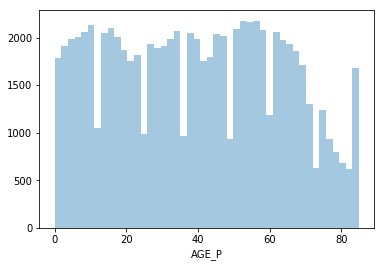

In [30]:
# data.AGE_P.value_counts()
ax = sns.distplot(data.AGE_P,kde = False)

In [226]:
import numpy as np
import pandas as pd
from os import listdir
from datetime import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline

import imageio
import bokeh.io
import time
import nltk
import nltk.corpus



import bokeh.layouts
from bokeh.models import ColumnDataSource, CustomJS, CDSView, GroupFilter, Span
from bokeh.models.widgets import Slider
from bokeh.plotting import figure, show
from bokeh.core.properties import value
from bokeh.io import output_file

In [227]:
test = pd.read_csv('../merged_data.csv', usecols = ['SRVY_YR', 'ERNYR_P', 'LADURB17'])
test.LADURB17 = np.where(test.LADURB17 != 8.0, test.LADURB17, 9.0)
test.LADURB17 = test.LADURB17.fillna(9.0).astype(int).astype(str).map(dicts['LADURB17'])
test.ERNYR_P = np.where(test.ERNYR_P != 98.0, test.ERNYR_P, 99.0)
test.ERNYR_P = test.ERNYR_P.fillna(99).astype(int).astype(str).str.zfill(2).map(dicts['ERNYR_P'])

ok = test.groupby('SRVY_YR').apply(lambda x:x.groupby('ERNYR_P').apply(lambda x:x.groupby('LADURB17').count()))
ok = ok.drop("ERNYR_P", axis=1)
ok.columns = ['Counts']
final = ok.reset_index()
final = final.groupby(['SRVY_YR','ERNYR_P']).apply(lambda x:x.groupby([x.index, 'LADURB17'])['Counts'].aggregate('first').unstack()).reset_index()
final = final.drop("level_2", axis=1).fillna(0).groupby(['SRVY_YR','ERNYR_P']).sum().reset_index()

order = [0,7,1,2,3,4,5,6,8,9,10,12]
xax = [final.ERNYR_P.unique()[i] for i in order]
final.SRVY_YR = final.SRVY_YR.astype(str)
years = sorted(final.SRVY_YR.unique())

output_file('incodepr.html', title = 'Income Level x Depression Length')

# Set up the slider.

start = 0
end = 11
slider = Slider(start = start, end = end, step = 1, value = start)


# Set up figure.
p = figure(title = years[start], width = 500, height = 500, x_axis_label='Income Level', y_axis_label = 'Counts', x_range=xax, y_range = (0, 100))

# # Set up data sources.
source = ColumnDataSource(final)
view = CDSView(source = source, filters = [GroupFilter(column_name = "SRVY_YR", group = years[start])])

p.vbar_stack(['Less than 3 months ', '3-5 months ','6-12 months ','More than 1 year ', 'Refused '], x = 'ERNYR_P', width=0.5, 
             color=['green', 'orange', 'blue', 'red', 'purple'], source=source, 
             view = view, legend = [value(x) for x in ['Less than 3 months ', '3-5 months ','6-12 months ','More than 1 year ', 'Refused ']])

p.xaxis.major_label_orientation = "vertical"
p.legend.orientation = "vertical"
p.legend.location = "top_right"


# ------------------------------------------------------------
# Set up the JavaScript callback.
# Use cb_obj to refer to the caller widget from a JavaScript callback.
callback = CustomJS(args = {"source": source, "view": view, "figure": p, "date": years}, code = """
    // This is the JavaScript code that will run whenever the slider is changed.
    // You can use the console.log() function to print values.
    
    var value = date[cb_obj.value]
    view.filters[0].group = value;
    figure.title.text = value;
    
    // Let Bokeh know the data source has changed.
    source.change.emit();
""")

slider.js_on_change("value", callback)

# ------------------------------------------------------------

# Finally, set up the layout and show everything.
layout = bokeh.layouts.Column(slider, p)
show(layout)

In [ ]:
final.groupby('SRVY_YR').apply(lambda x:x.iloc[:,2:].sum()["Don't know "])

In [ ]:
test.groupby('SRVY_YR').size()

In [ ]:
dicts['ERNYR_P']
# ERNYR_P LADURB17 SRVY_YR

After looking at the data for one year, we wanted to do the same for each year in the survey data.
After cleaning the data, we plotted an interactive plot to show the distribution of each year's reported depression length by income level. 

The plot shows that as time goes on, there were more reports of depression at each income level. This could suggest more people are becoming okay with sharing the information about themselves. 
It was also noted that each year had about 75000 to 110000 observations. However, most of these obsevations did not have a reported depression length either from the person not knowing if they were depressed or not wanting to report it or leaving the question empty. About 95% of the observations did not have a value for length of depression. This plot showcased the 5% that reported a depression length. The number of observations from each year increasd as the year went up until 2014. That year the number of observations peaked and the number of observations declined after.

The general trend of the distributions for each year was similar to each other. Each year the lowest income level had the highest counts of reported depression. The $65,000 to $75,000 income level had the least reported depression lengths. The general trend between income level and depression was lower income level, more counts of reported depression and higher income level, less counts of reported depression. 

More than 1 year of depression was the majority of the counts for most of the income levels in each year. As each year passes, it is possible that the reported depression favors the more than one year of depression option. If the people from the previous year were still depressed, they would be in the more than one year option for the next years. 